# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "Grupa laboratoryjna: 3, projektowa: 1"
COLLABORATORS = "Aleksandra Grot 407392, Malgorzata Serwanska 405044, Adam Lewinski 407657"

---

## Zestaw zadań 1: Generowanie procesów punktowych

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

### Zadanie 1: Proces regularny z komponentem losowym w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `regular_on_rectangle()`, która będzie generować proces regularny z komponentem losowym w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1) Generujemy punkty na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty są oddalone od krawędzi obszaru odpowiednio o $\frac{1}{2} d_x$ w poziomie i $\frac{1}{2}d_y$ w pionie.
2) Do współrzędnych każdego z punktów dodajemy komponent losowy określony wzorem $r \cdot rand$ , gdzie $r$ to parametr określający wielkość komponentu losowego, a $rand$ to wartość wylosowana z rozkładu jednostajnego na przedziale $[-\frac{1}{2} d_x, \frac{1}{2} d_x]$ w przypadku współrzędnej $x$ i na przedziale $[-\frac{1}{2} d_y, \frac{1}{2} d_y]$ w przypadku współrzędnej $y$.

Parametry przykładowego rozkładu:
 - liczba punktów w poziomie: 20
 - liczba punktów w pionie: 10
 - wartość współczynnika określającego siłę komponentu losowego: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10


#### a) Przygotowanie funkcji

In [4]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    dx = (x_lim[-1]-x_lim[0])/grid[-1]
    dy = (y_lim[-1]-y_lim[0])/grid[0]
    x=[]
    y=[]
    for i in range(grid[0]):
        for j in range(grid[-1]):
            x.append(dx/2+j*dx+random_component*(np.random.random_sample()*dx-dx/2))
            y.append(dy/2+i*dy+random_component*(np.random.random_sample()*dy-dy/2))
    d={"X":x,"Y":y}
    df=pd.DataFrame(data=d)
    return df


#### b) Wygenerowanie procesu

In [5]:
# YOUR CODE HERE
result=regular_on_rectangle([10,20],0.5,[0,20],[0,10])

#### c) Wizualizacja

Text(0, 0.5, 'vertical')

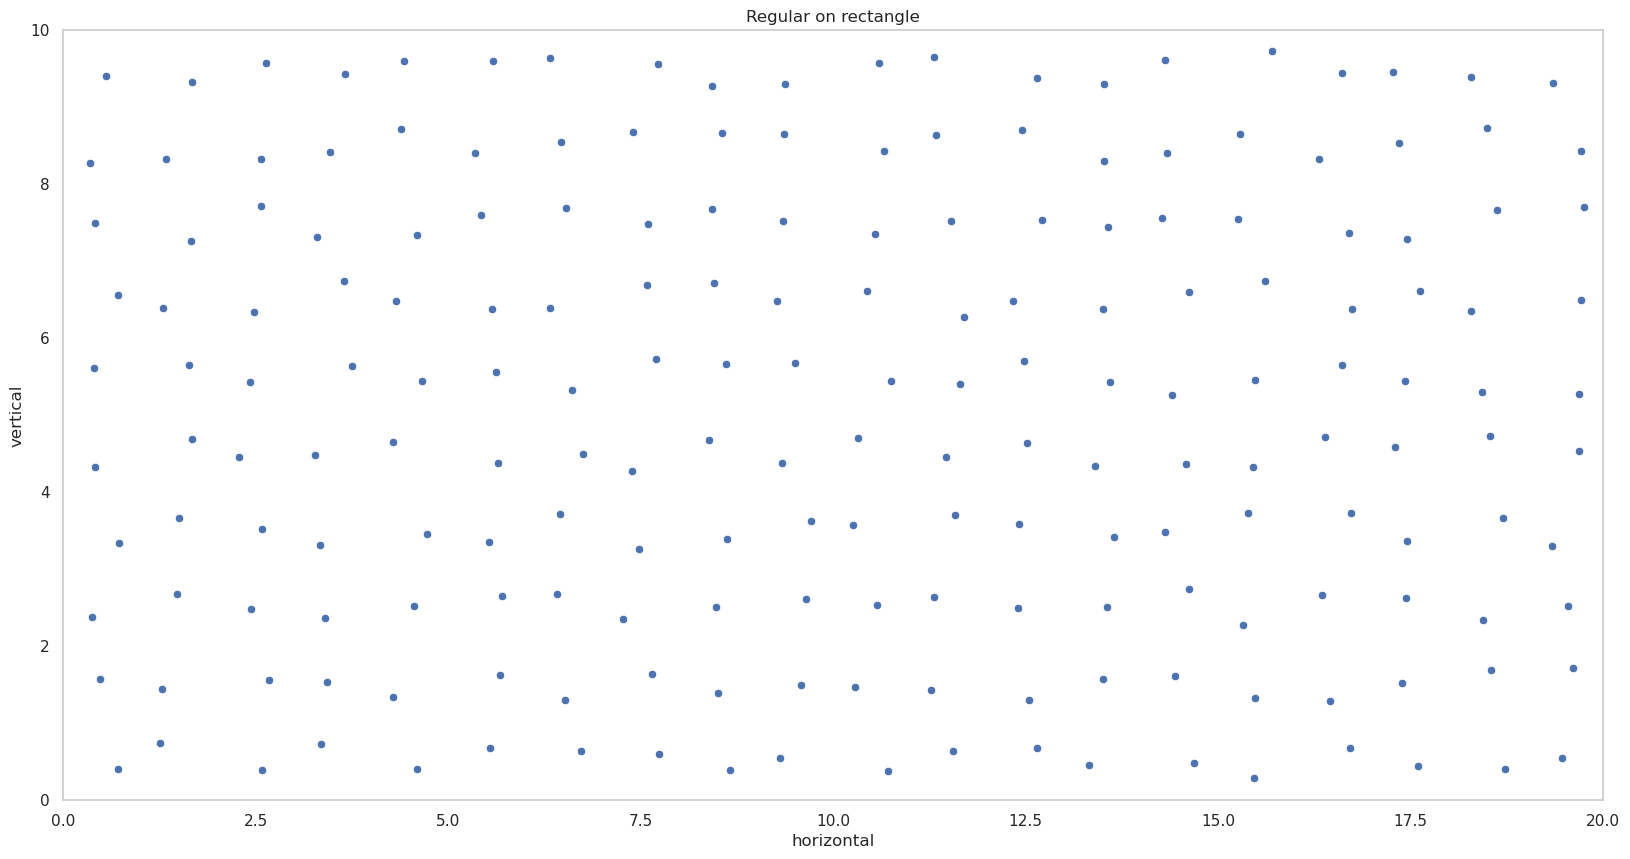

In [6]:
# YOUR CODE HERE
fix,ax=plt.subplots(1,1,figsize=(20,10))
plt.grid(False)
sns.scatterplot(data=result,x="X",y="Y",ax=ax)
plt.title("Regular on rectangle")
#ax.set_aspect('auto')
ax.axis("square")
ax.set_xlim([0,20])
ax.set_ylim([0,10])
ax.set_xlabel("horizontal")
ax.set_ylabel("vertical")


### Zadanie 2: Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `homogeneous_poisson_on_rectangle()`, która będzie generować jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Losujemy liczbę punktów $n$ z rozkładu Poissona o wartości oczekiwanej równej $i \cdot a$, gdzie $i$ to intensywność procesu, a $a$ jest powierzchnią obszaru, na którym generujemy punkty.
2. Niezależnie od siebie losujemy wartości współrzędnych $n$ punktów z rozkładów jednostajnych na przedziałach określonych przez przyjęte zakresy wartości współrzędnych $x$ i $y$.

Parametry przykładowego rozkładu:
 - intensywność procesu: 10
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [7]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    n=sp.stats.poisson.rvs(intensity*(x_lim[-1]-x_lim[0])*(y_lim[-1]-y_lim[0]))
    X=[]
    Y=[]
    for i in range(n):
        X.append(np.random.random_sample()*(x_lim[-1]-x_lim[0])+x_lim[0])
        Y.append(np.random.random_sample()*(y_lim[-1]-y_lim[0])+y_lim[0])
    d={"X":X,"Y":Y}
    df=pd.DataFrame(data=d)
    return df
    

#### b) Wygenerowanie procesu

In [8]:
# YOUR CODE HERE
result=homogeneous_poisson_on_rectangle(10,[0,20],[0,10])

#### c) Wizualizacja

Text(0, 0.5, 'Y')

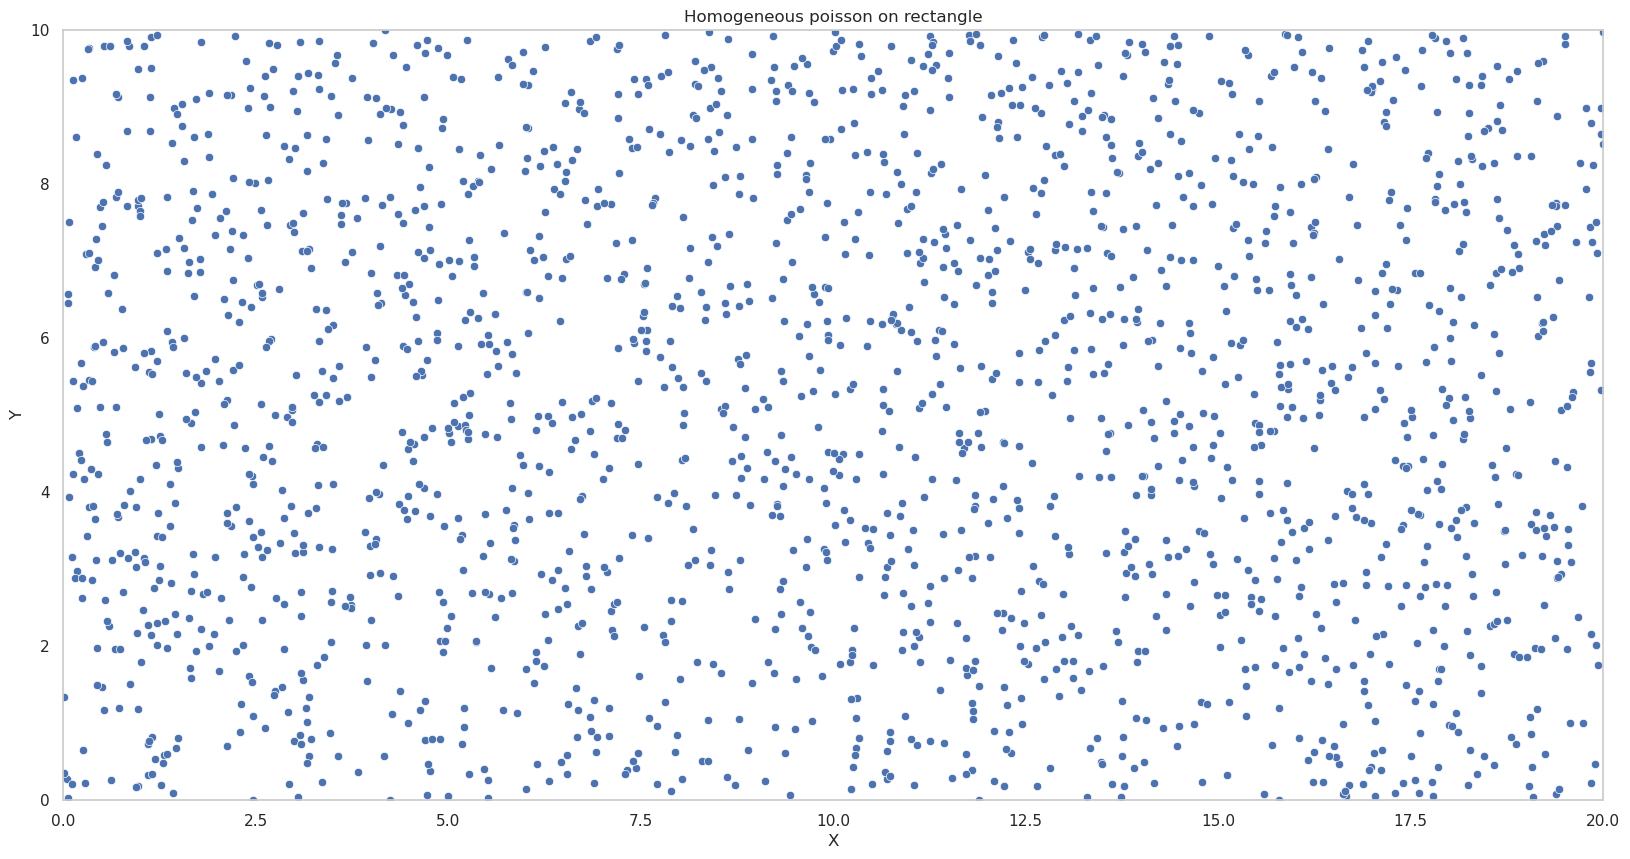

In [9]:
# YOUR CODE HERE
fix,ax=plt.subplots(1,1,figsize=(20,10))
plt.grid(False)
sns.scatterplot(data=result,x="X",y="Y",ax=ax)
plt.title("Homogeneous poisson on rectangle")
#ax.set_aspect('auto')
ax.axis("square")
ax.set_xlim([0,20])
ax.set_ylim([0,10])
ax.set_xlabel("X")
ax.set_ylabel("Y")

### Zadanie 3: Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `unhomogeneous_poisson_on_rectangle()`, która będzie generować niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Generujemy punkty z wykorzystaniem jednorodnego procesu Poissona przyjmując intensywność procesu równą maksymalnej wartości jaką osiąga funkcja intensywności w analizowanym obszarze.
2. Przerzedzamy rozkład usuwając z niego punkty z prawdopodobieństwem równym $1-\frac{i}{i_{max}}$, gdzie $i$ to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu, a $i_{max}$ to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru.

Parametry przykładowego rozkładu:
 - intensywność procesu: f(x, y) = x
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [10]:
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    maximize = sp.optimize.minimize(lambda x : -intensity_function(x[0],x[1]),[1,1],
                                    bounds = [(x_lim[0],x_lim[1]), (y_lim[0],y_lim[1])])
    df = homogeneous_poisson_on_rectangle(intensity_function(maximize["x"][0],maximize["x"][1]),
                                          [x_lim[0],x_lim[-1]],[y_lim[0],y_lim[-1]])
    dX = df["X"]
    dY = df["Y"]
    pop_list = []
    x = dX.values.tolist()
    y = dY.values.tolist()
    
    for i in range (df.shape[0]):
        r = np.random.random_sample()
        if(r <= 1-intensity_function(x[i],y[i])/intensity_function(maximize["x"][0],maximize["x"][1])):
            pop_list.append(i)
    pop_list.reverse()
    for elem in pop_list:
        x.pop(elem)
        y.pop(elem)
    d={"X":x,"Y":y}
    df=pd.DataFrame(data=d)
    return df
    

#### b) Wygenerowanie procesu

In [11]:
# YOUR CODE HERE
np.random.seed(1)
result = unhomogeneous_poisson_on_rectangle(lambda x, y : x ,[0,20],[0,10])

#### c) Wizualizacja

Text(0, 0.5, 'Y')

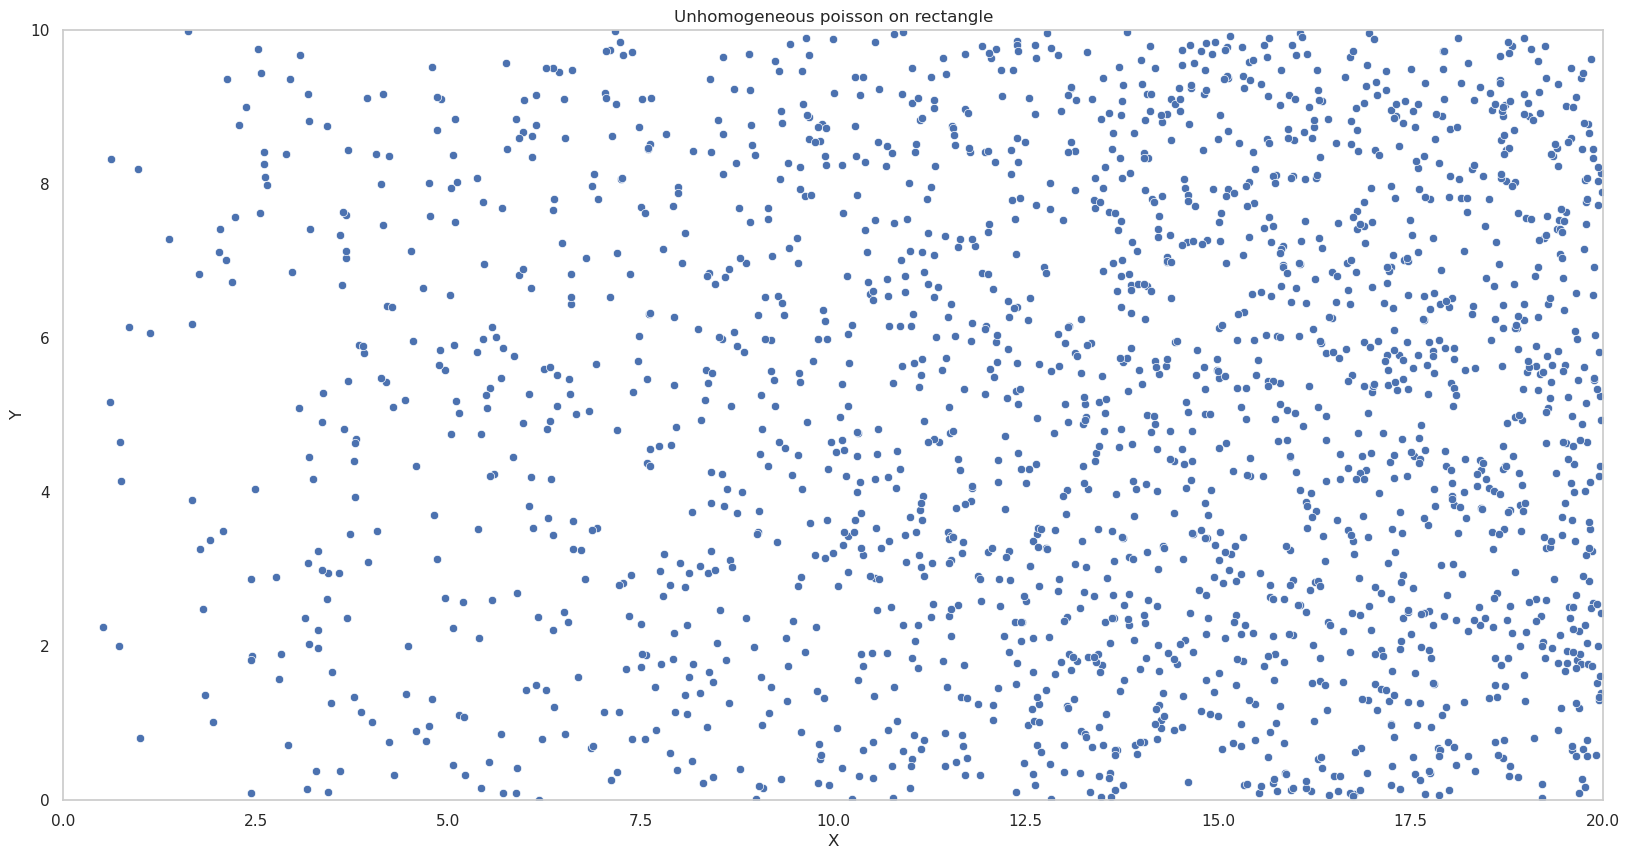

In [12]:
# YOUR CODE HERE
fix,ax=plt.subplots(1,1,figsize=(20,10))
plt.grid(False)
sns.scatterplot(data=result,x="X",y="Y",ax=ax)
plt.title("Unhomogeneous poisson on rectangle")
#ax.set_aspect('auto')
ax.axis("square")
ax.set_xlim([0,20])
ax.set_ylim([0,10])
ax.set_xlabel("X")
ax.set_ylabel("Y")

### Zadanie 4: Proces punktowy Matérna w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `materna_on_rectangle()`, która będzie generować proces punktowy Materna w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor równy wartości parametru `cluster_radius`.
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Wokół każdego z wygenerowanych punktów (okrąg o promieniu równym wartości parametru `cluster_radius`) generujemy punkty z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `daughter_intensity`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - intensywność procesu potomnego: 10
 - promień klastra: 1
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [13]:
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    df = homogeneous_poisson_on_rectangle(parent_intensity,[x_lim[0]-cluster_radius,x_lim[1]+cluster_radius]
                                                          ,[y_lim[0]-cluster_radius,y_lim[1]+cluster_radius])
    x=[]
    y=[]
    def homo_circle(intensity, x, y, r):
        n=sp.stats.poisson.rvs(intensity*np.pi*r*r)
        X=[]
        Y=[]
        for i in range(n):
            alpha = 2 * np.pi * np.random.random_sample()
            c_r = r * np.sqrt(np.random.random_sample())
            X.append(c_r * np.cos(alpha) + x)
            Y.append(c_r * np.sin(alpha) + y)
        return X,Y
    
    for i in range(df.shape[0]):
        AA,BB = homo_circle(daughter_intensity,df["X"].tolist()[i],df["Y"].tolist()[i],cluster_radius)
        c = zip(AA, BB)
        for a,b in c:
            if a>x_lim[0] and a<x_lim[1] and b>y_lim[0] and b<y_lim[1]:
                x.append(a)
                y.append(b)
    d={"X":x,"Y":y}
    df=pd.DataFrame(data=d)
    return df
        

#### b) Wygenerowanie procesu

In [19]:
# YOUR CODE HERE
result = materna_on_rectangle(0.2,10,1,[0,20],[0,10])

#### c) Wizualizacja

Text(0, 0.5, 'Y')

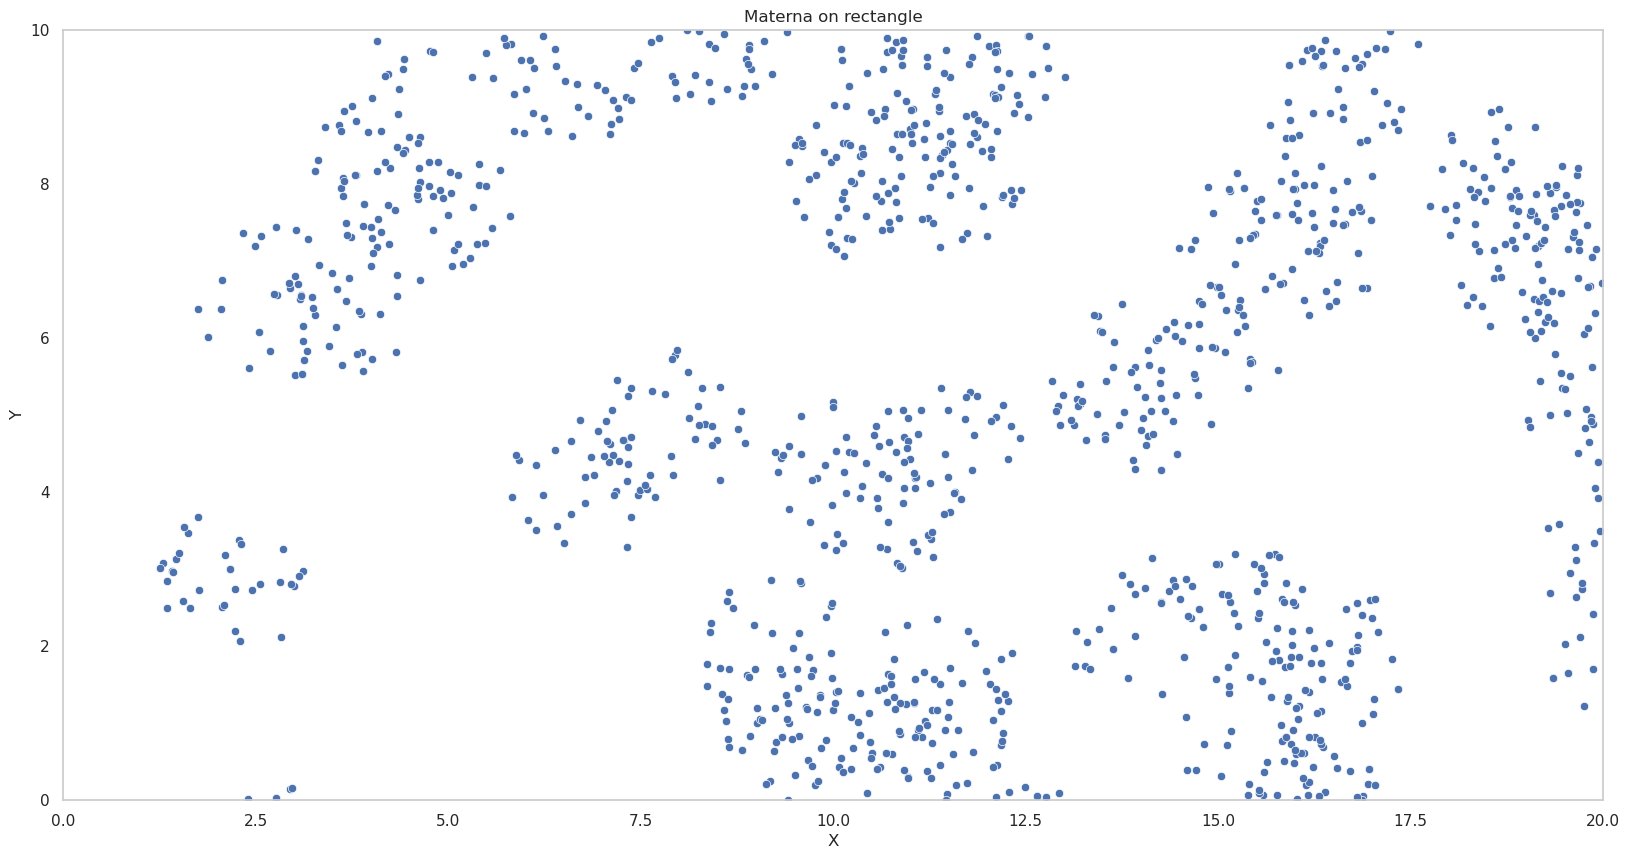

In [20]:
# YOUR CODE HERE
fix,ax=plt.subplots(1,1,figsize=(20,10))
plt.grid(False)
sns.scatterplot(data=result,x="X",y="Y",ax=ax)
plt.title("Materna on rectangle")
#ax.set_aspect('auto')
ax.axis("square")
ax.set_xlim([0,20])
ax.set_ylim([0,10])
ax.set_xlabel("X")
ax.set_ylabel("Y")

### Zadanie 5: Proces punktowy Thomasa w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `thomas_on_rectangle()`, która będzie generować proces punktowy Thomasa w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor, którego wielkość jest zależna od wartości parametru `cluster_sigma` (na potrzeby zadania przyjmijmy 4-krotność wartości tego parametru).
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Dla każdego z wygenerowanych punktów (centrów klastrów):
    - Losujemy liczbę punktów znajdujących się w obrębie danego klastra $n_c$ z rozkładu Poissona o wartości oczekiwanej równej wartości parametru `mean_cluster_size`.
    - Niezależnie od siebie losujemy wartości współrzędnych $n_c$ punktów z rozkładów normalnych o wartości oczekiwanej równej współrzędnej punktu stanowiącego centrum klastra i odchyleniu standardowym równym wartości parametru `cluster_sigma`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - średnia liczebność klastra: 30
 - odchylenie standardowe klastra: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [16]:
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    df = homogeneous_poisson_on_rectangle(parent_intensity,[x_lim[0]-4*cluster_sigma,x_lim[1]+4*cluster_sigma]
                                                          ,[y_lim[0]-4*cluster_sigma,y_lim[1]+4*cluster_sigma])
    x = []
    y = []
    X = []
    Y = []
    for index, row in df.iterrows():
        n=sp.stats.poisson.rvs(mean_cluster_size)
        x.append(np.random.normal(row["X"], cluster_sigma, n))
        y.append(np.random.normal(row["Y"], cluster_sigma, n))
    for a,b in zip(x,y):
        for aa,bb in zip(a,b):
            if aa>x_lim[0] and aa<x_lim[1] and bb>y_lim[0] and bb<y_lim[1]:
                X.append(aa)
                Y.append(bb)
    d={"X":X,"Y":Y}
    df=pd.DataFrame(data=d)
    return df
    
    

#### b) Wygenerowanie procesu

In [17]:
# YOUR CODE HERE
result = thomas_on_rectangle(0.2, 30, 0.5, [0,20], [0,10])

#### c) Wizualizacja

Text(0, 0.5, 'Y')

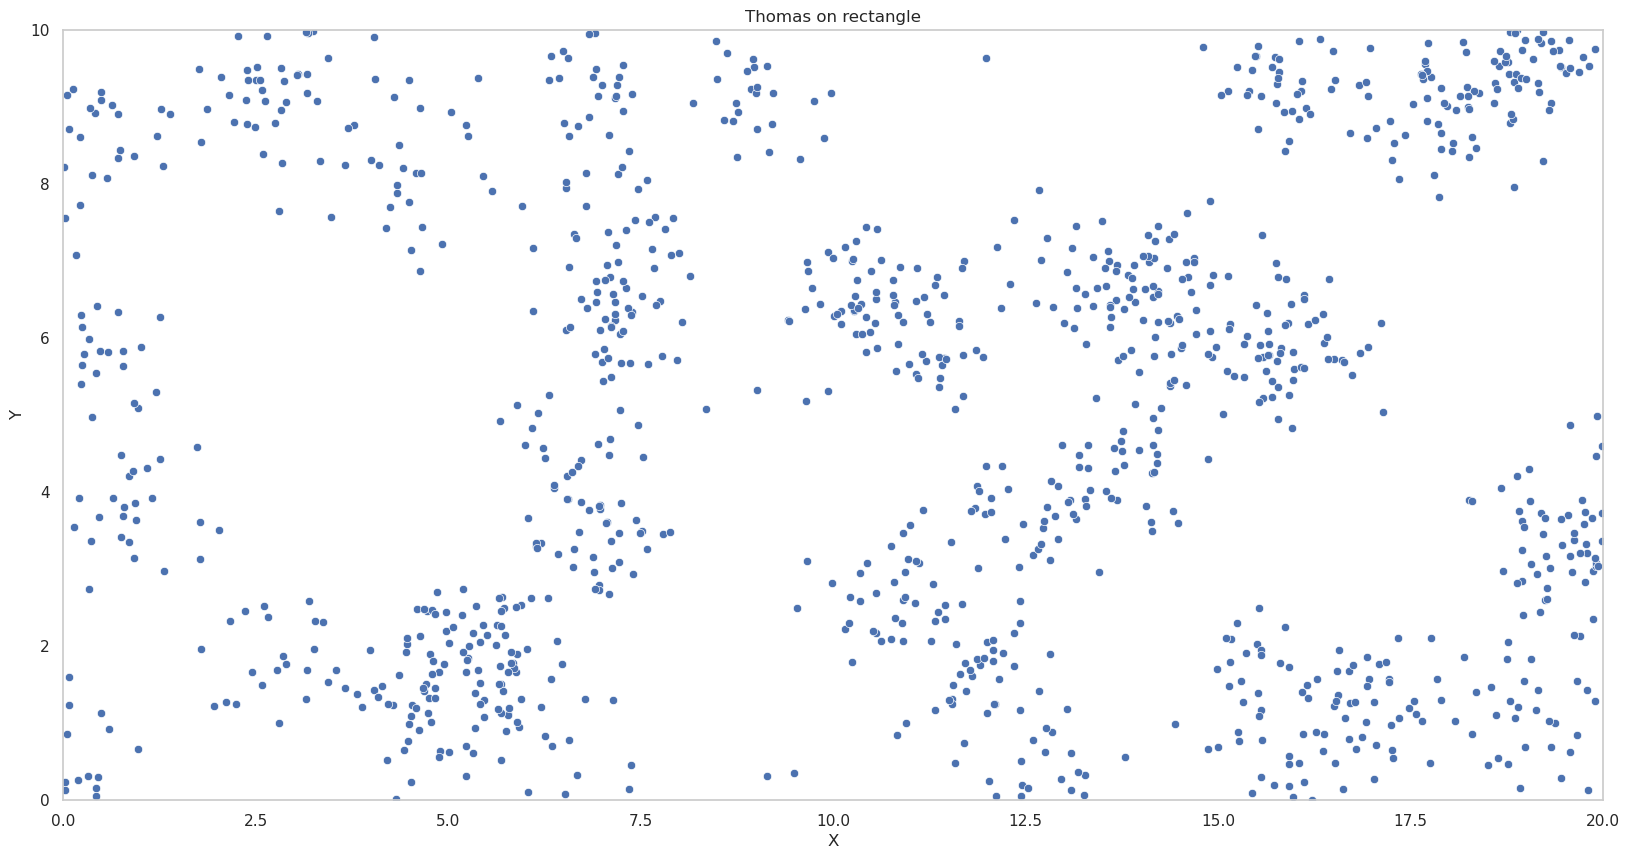

In [18]:
# YOUR CODE HERE
fix,ax=plt.subplots(1,1,figsize=(20,10))
plt.grid(False)
sns.scatterplot(data=result,x="X",y="Y",ax=ax)
plt.title("Thomas on rectangle")
#ax.set_aspect('auto')
ax.axis("square")
ax.set_xlim([0,20])
ax.set_ylim([0,10])
ax.set_xlabel("X")
ax.set_ylabel("Y")